In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime


In [32]:
# Set up Pandas DataReader to use Yahoo Finance
yf.pdr_override()

# The list of companies
company_symbols = ['MARUTI.NS', 'SBIN.NS', 'AXISBANK.NS', 'TATASTEEL.NS']

# Set the start and end dates for data retrieval
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


In [33]:

# Download the data for the companies
company_data = {}
for symbol in company_symbols:
    company_data[symbol] = yf.download(symbol, start, end)

# Set up company names
company_names = {
    'MARUTI.NS': 'Maruti Suzuki India Limited',
    'SBIN.NS': 'State Bank of India',
    'AXISBANK.NS': 'Axis Bank Limited',
    'TATASTEEL.NS': 'Tata Steel Limited'
}



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [34]:
# Add company names to the DataFrame
for symbol, name in company_names.items():
    company_data[symbol]['Company'] = name

# Concatenate dataframes into one
df = pd.concat([company_data[symbol] for symbol in company_symbols], axis=0)


In [35]:

# Summary statistics
for symbol in company_symbols:
    print(f"Summary statistics for {company_names[symbol]}:")
    print(company_data[symbol]['Adj Close'].describe())
    print()


Summary statistics for Maruti Suzuki India Limited:
count      250.000000
mean      8963.072711
std        539.284859
min       8065.697754
25%       8546.077148
50%       8826.042969
75%       9402.105469
max      10533.849609
Name: Adj Close, dtype: float64

Summary statistics for State Bank of India:
count    250.000000
mean     563.880977
std       30.431821
min      495.716980
25%      537.504898
50%      569.750000
75%      588.537491
max      620.200012
Name: Adj Close, dtype: float64

Summary statistics for Axis Bank Limited:
count     250.000000
mean      897.368557
std        62.889216
min       714.979126
25%       856.999451
50%       903.715820
75%       950.000000
max      1014.450012
Name: Adj Close, dtype: float64

Summary statistics for Tata Steel Limited:
count    250.000000
mean     108.223252
std        8.088353
min       92.191040
25%      102.189707
50%      106.087494
75%      114.960028
max      131.750000
Name: Adj Close, dtype: float64



In [36]:

# General info
for symbol in company_symbols:
    print(f"General info for {company_names[symbol]}:")
    print(company_data[symbol].info())
    print()


General info for Maruti Suzuki India Limited:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-09-13 to 2023-09-13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
 6   Company    250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB
None

General info for State Bank of India:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-09-13 to 2023-09-13
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 

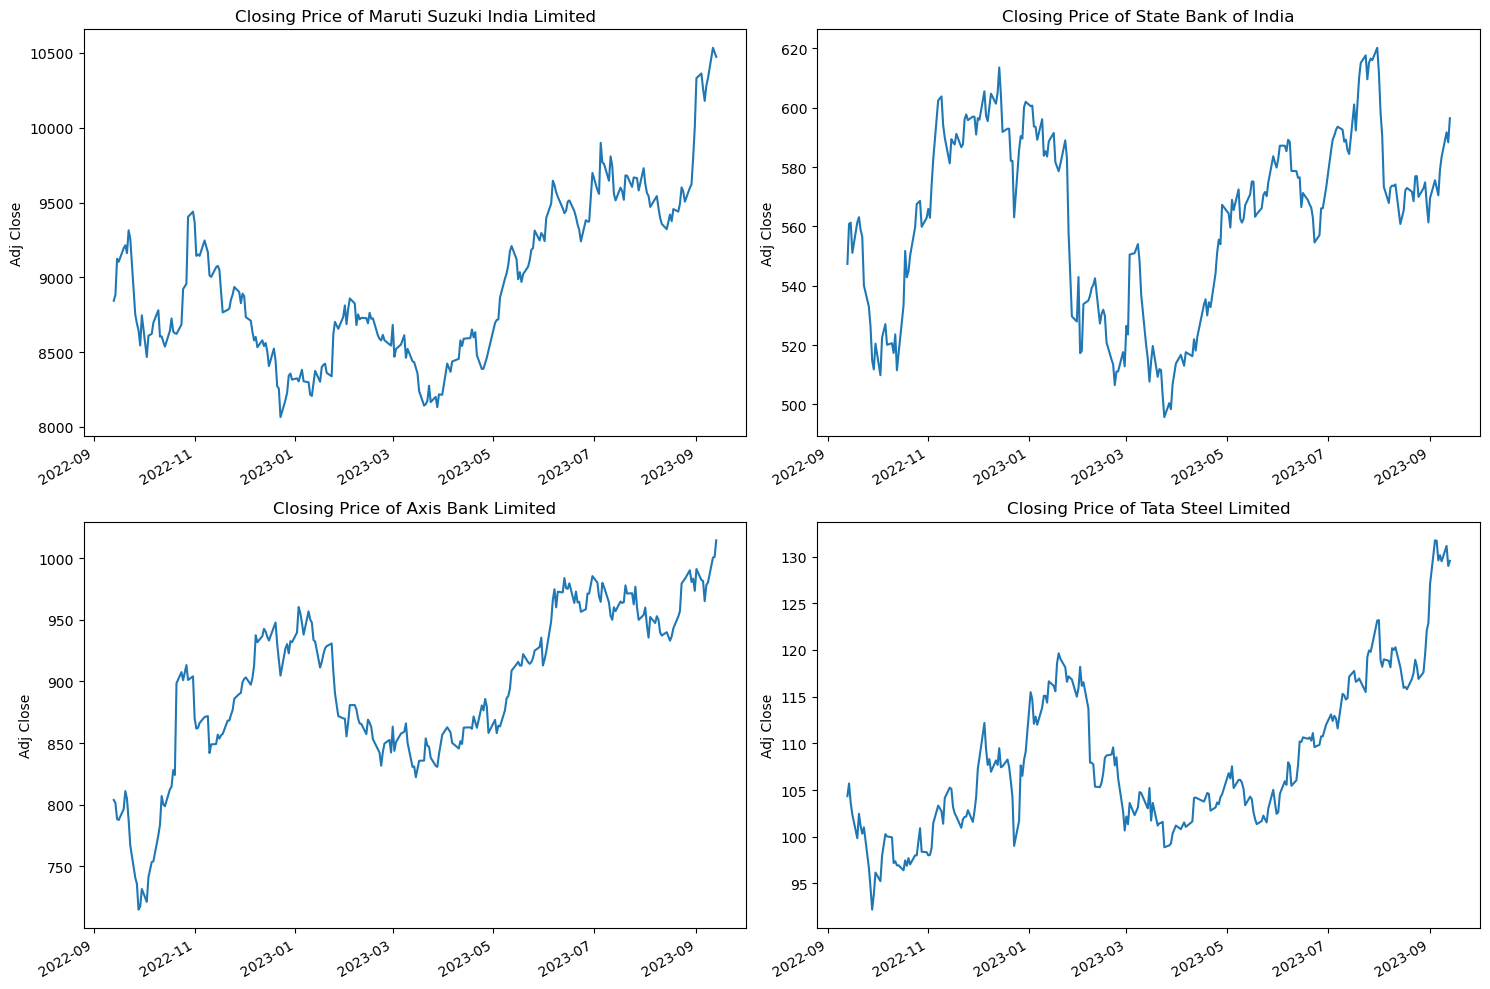

In [37]:
# Plot closing prices
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, symbol in enumerate(company_symbols, 1):
    plt.subplot(2, 2, i)
    company_data[symbol]['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {company_names[symbol]}")

plt.tight_layout()


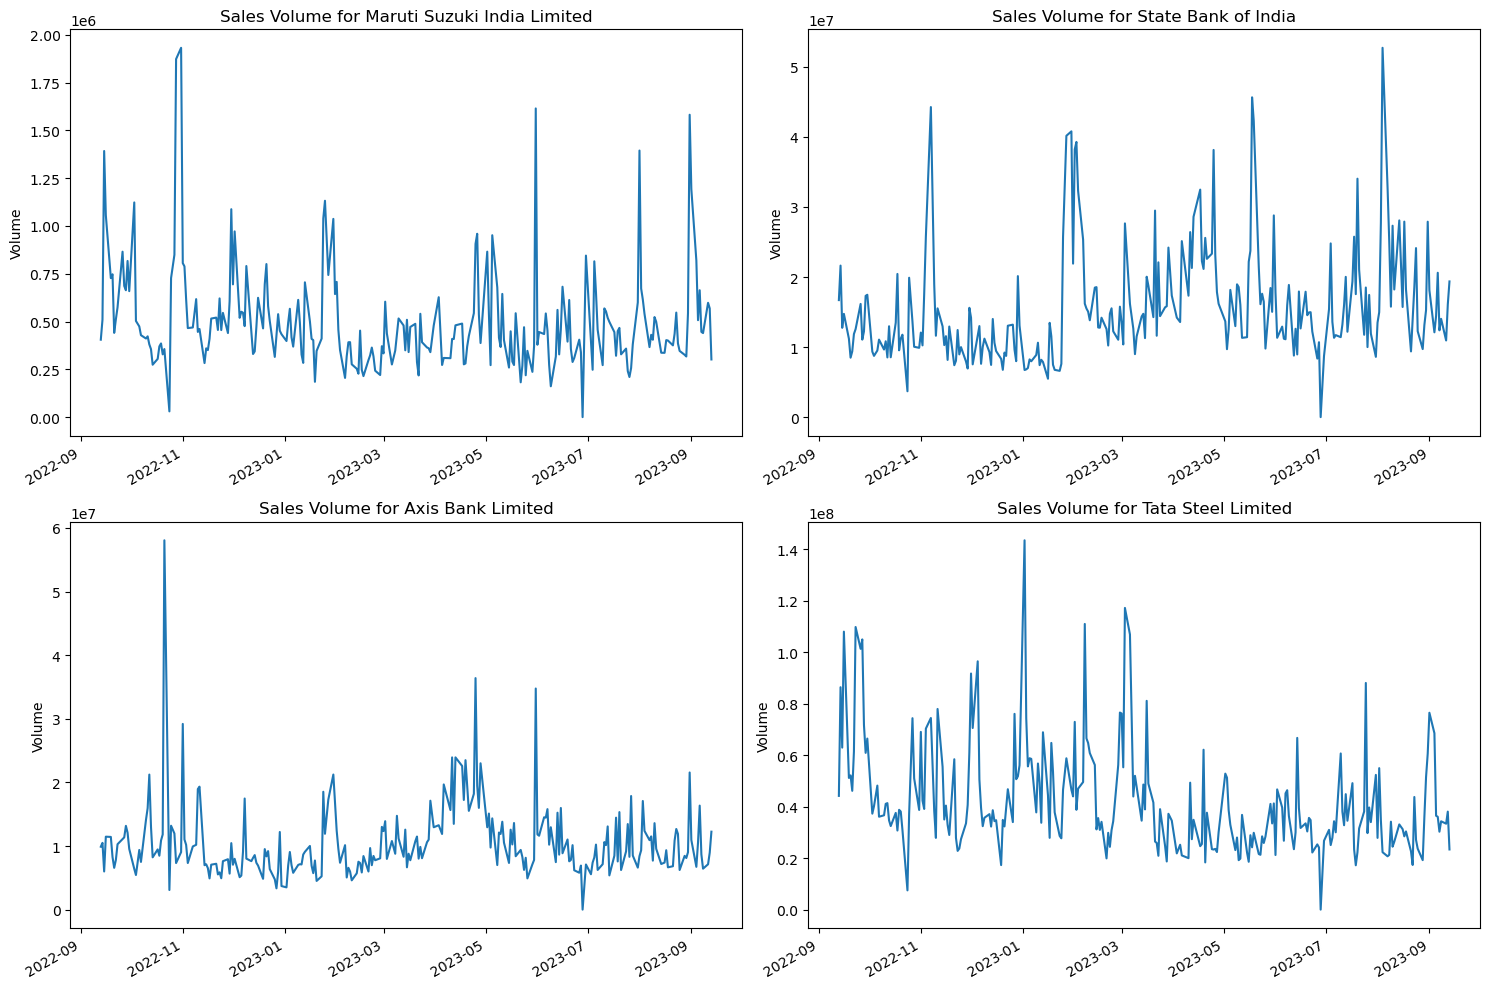

In [38]:


# Plot sales volume
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, symbol in enumerate(company_symbols, 1):
    plt.subplot(2, 2, i)
    company_data[symbol]['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {company_names[symbol]}")

plt.tight_layout()


In [39]:

# ####### Moving averages
# ma_day = [10, 20, 50]

# for ma in ma_day:
#     for symbol in company_symbols:
#         column_name = f"MA for {ma} days"
#         company_data[symbol][column_name] = company_data[symbol]['Adj Close'].rolling(ma).mean()

# fig, axes = plt.subplots(nrows=2, ncols=2)
# fig.set_figheight(10)
# fig.set_figwidth(15)

# for i, symbol in enumerate(company_symbols, 1):
#     plt.subplot(2, 2, i)
#     company_data[symbol][['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=axes[i - 1, i - 1])
#     plt.title(f'{company_names[symbol]}')

# fig.tight_layout()


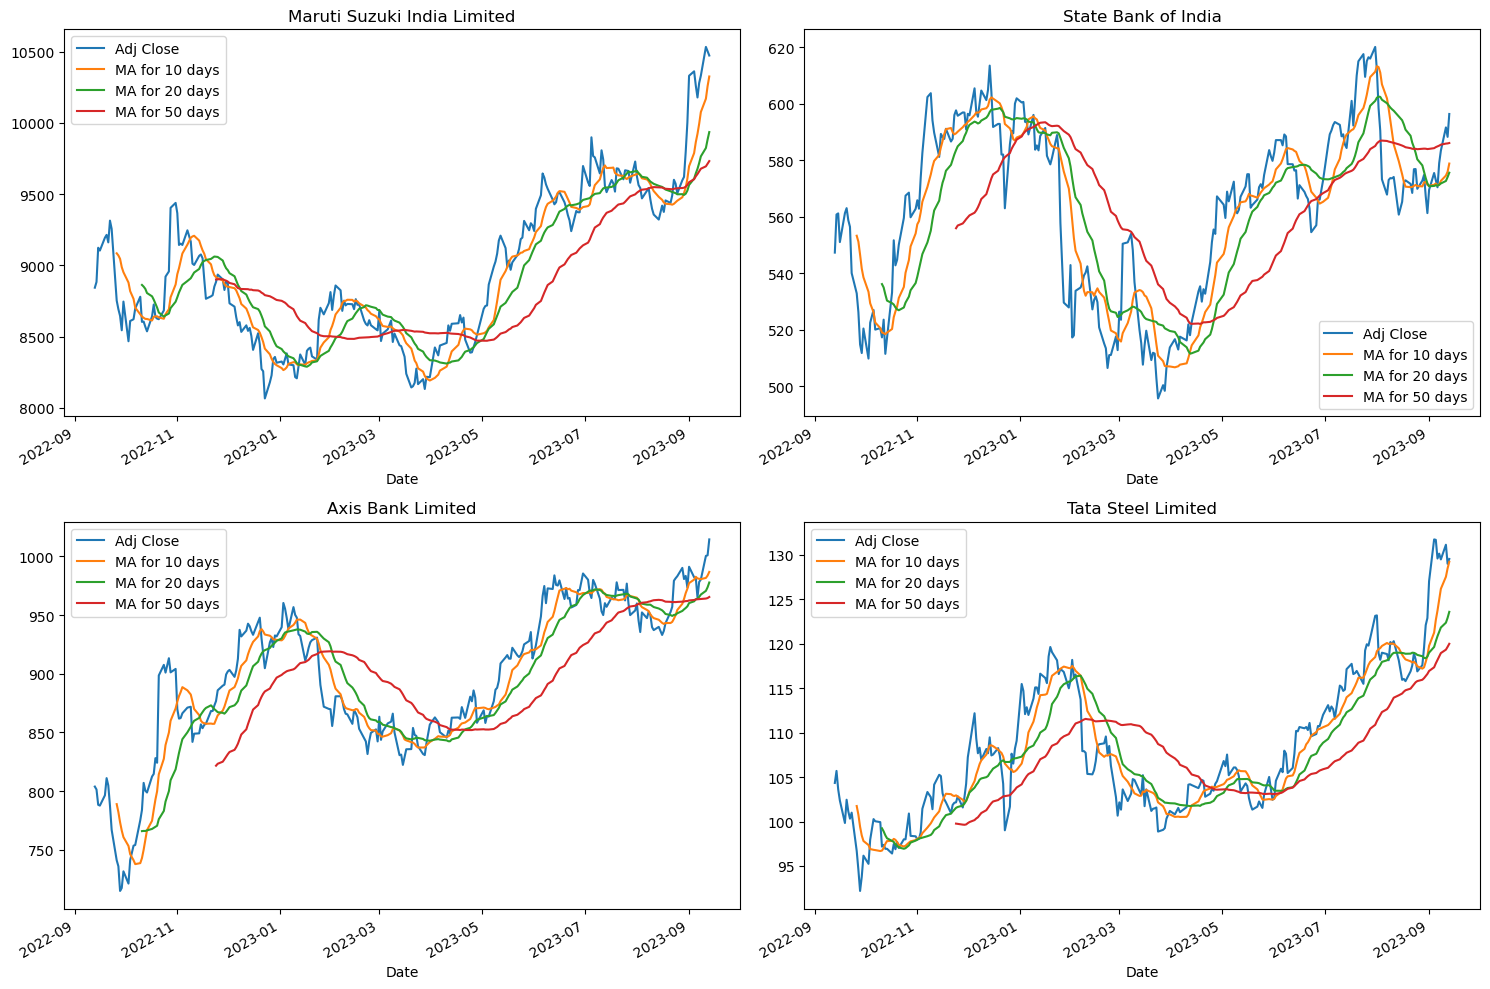

In [40]:
# Moving averages
ma_day = [10, 20, 50]

# Determine the number of rows and columns for subplots based on the number of companies
num_rows = (len(company_symbols) + 1) // 2  # Ceiling division to ensure enough rows
num_cols = min(len(company_symbols), 2)     # Limit to a maximum of 2 columns

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.subplots_adjust(top=1.25, bottom=0.9)

for i, symbol in enumerate(company_symbols):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        company_data[symbol][column_name] = company_data[symbol]['Adj Close'].rolling(ma).mean()
    company_data[symbol][['Adj Close', f'MA for {ma_day[0]} days', f'MA for {ma_day[1]} days', f'MA for {ma_day[2]} days']].plot(ax=ax)
    ax.set_title(f'{company_names[symbol]}')

fig.tight_layout()


In [41]:

# Daily returns
for symbol in company_symbols:
    company_data[symbol]['Daily Return'] = company_data[symbol]['Adj Close'].pct_change()


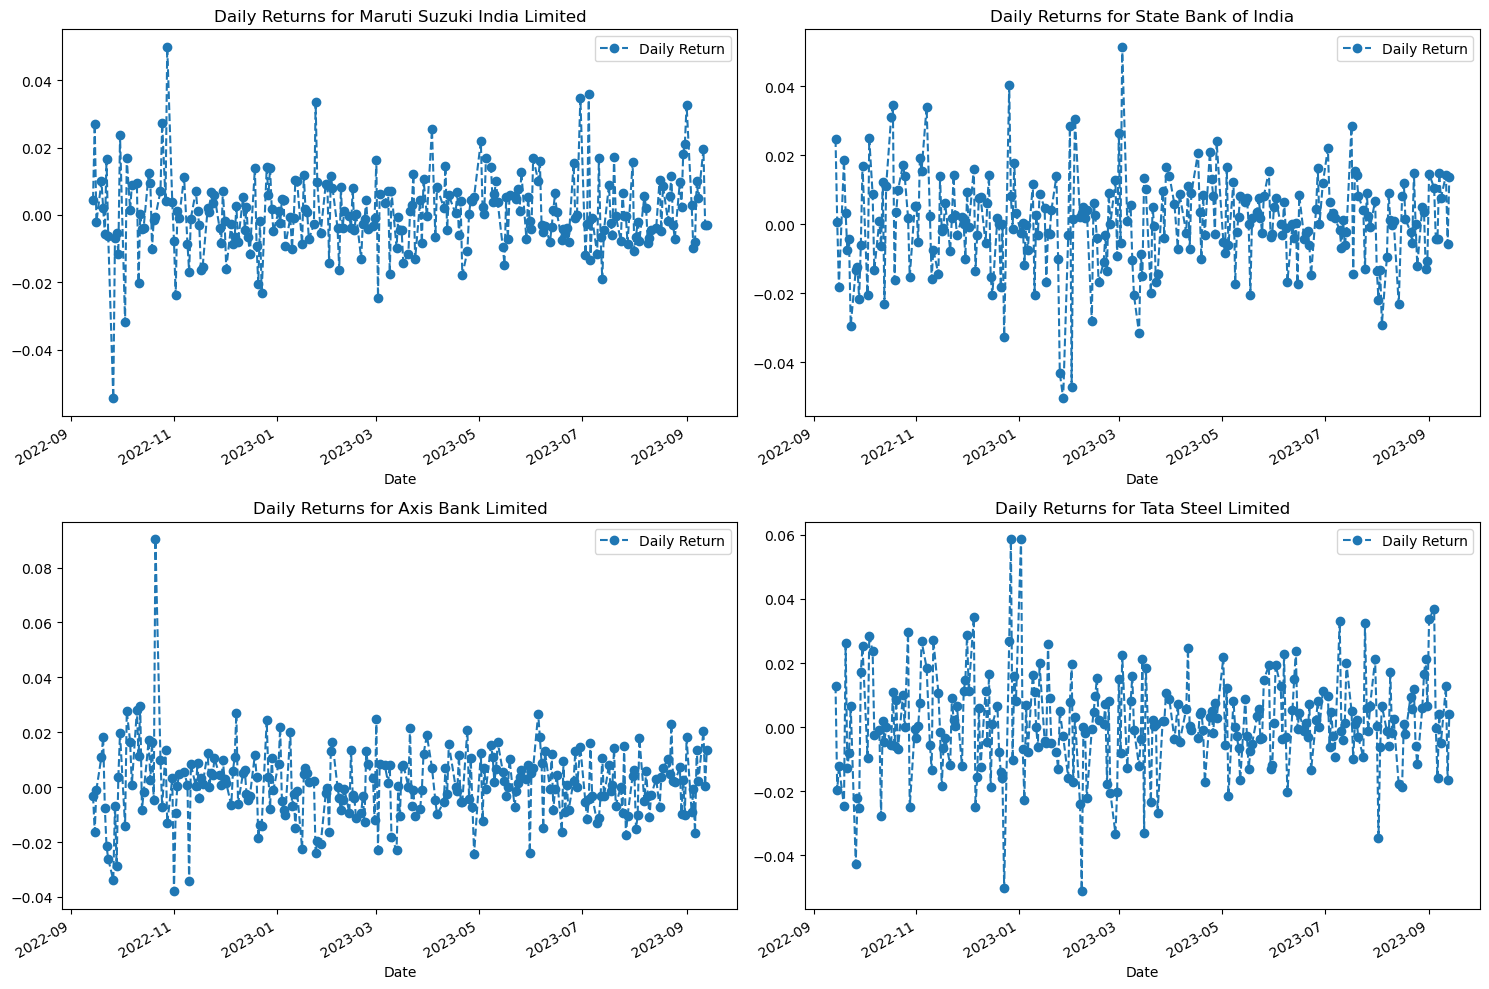

In [42]:

# Plot daily returns
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

for i, symbol in enumerate(company_symbols, 1):
    plt.subplot(2, 2, i)
    company_data[symbol]['Daily Return'].plot(legend=True, linestyle='--', marker='o')
    plt.title(f'Daily Returns for {company_names[symbol]}')

fig.tight_layout()



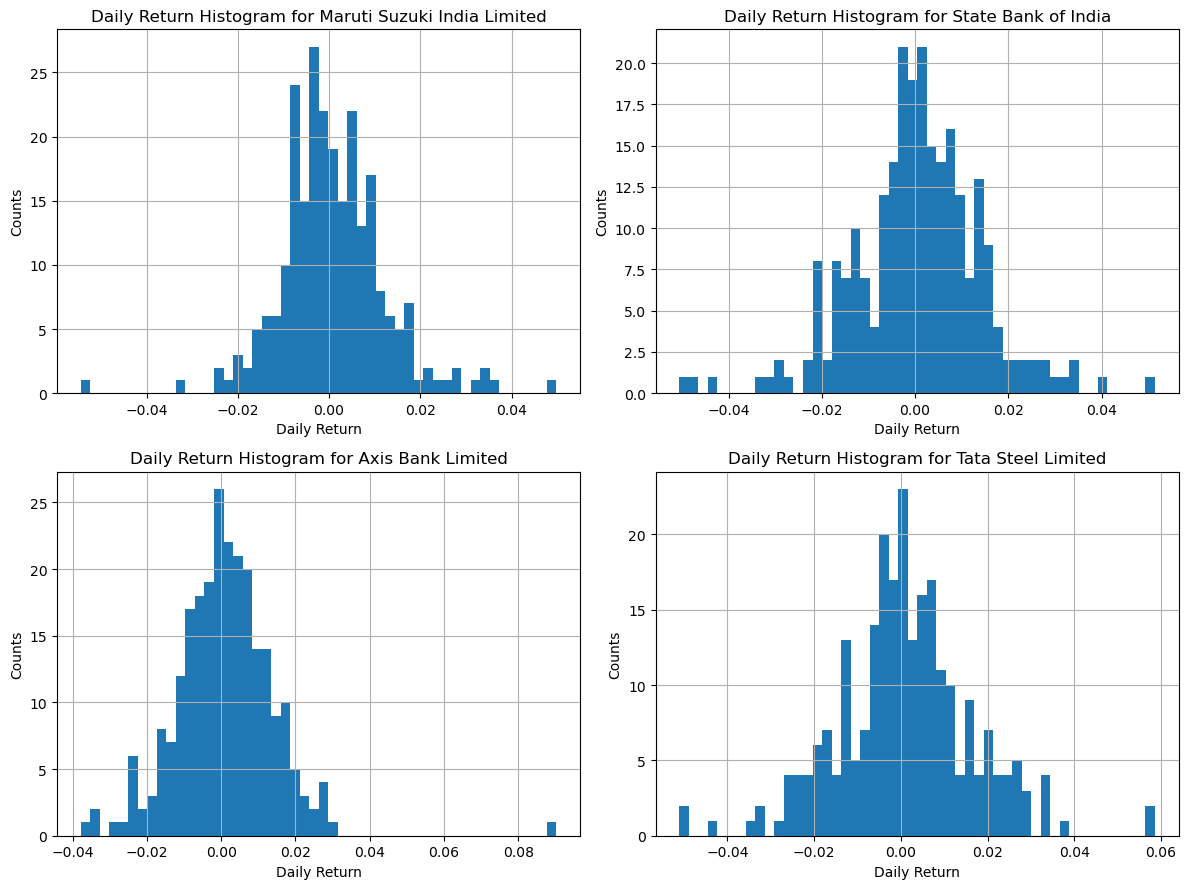

In [43]:

# Histogram of daily returns
plt.figure(figsize=(12, 9))

for i, symbol in enumerate(company_symbols, 1):
    plt.subplot(2, 2, i)
    company_data[symbol]['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'Daily Return Histogram for {company_names[symbol]}')

plt.tight_layout()



In [44]:
# Grab all the closing prices for the companies into one DataFrame
closing_df = pdr.get_data_yahoo(company_symbols, start=start, end=end)['Adj Close']



[*********************100%%**********************]  4 of 4 completed


In [45]:
# Make a new returns DataFrame
company_rets = closing_df.pct_change()



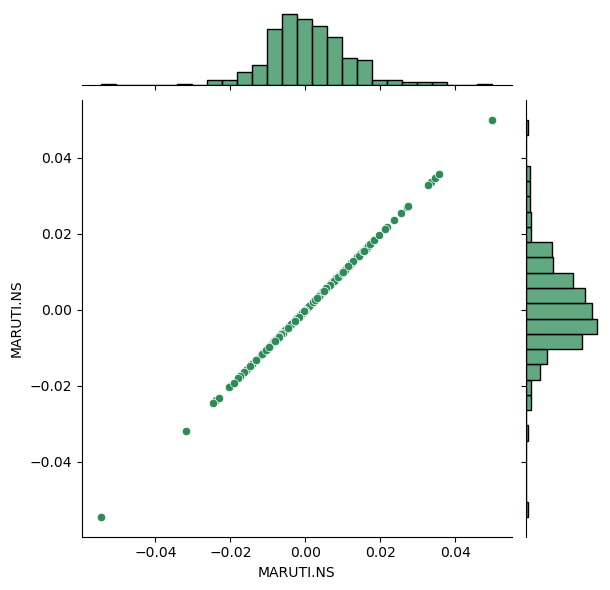

In [46]:
# Jointplot of returns
sns.jointplot(x=company_symbols[0], y=company_symbols[0], data=company_rets, kind='scatter', color='seagreen')


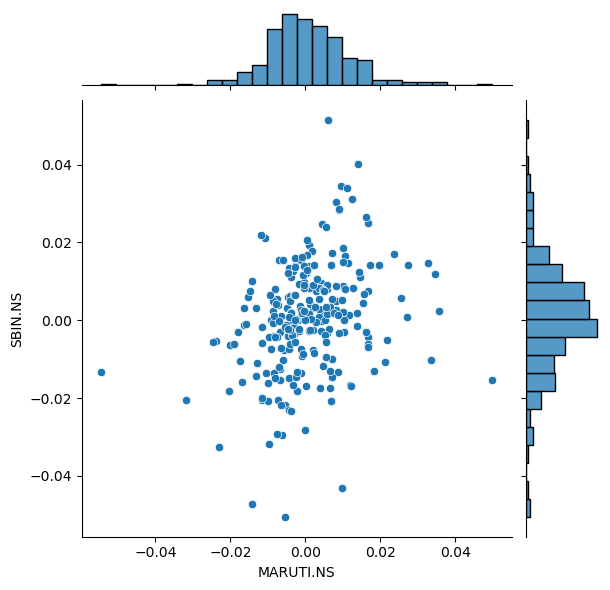

In [47]:
# Compare daily returns between two companies
sns.jointplot(x=company_symbols[0], y=company_symbols[1], data=company_rets, kind='scatter')


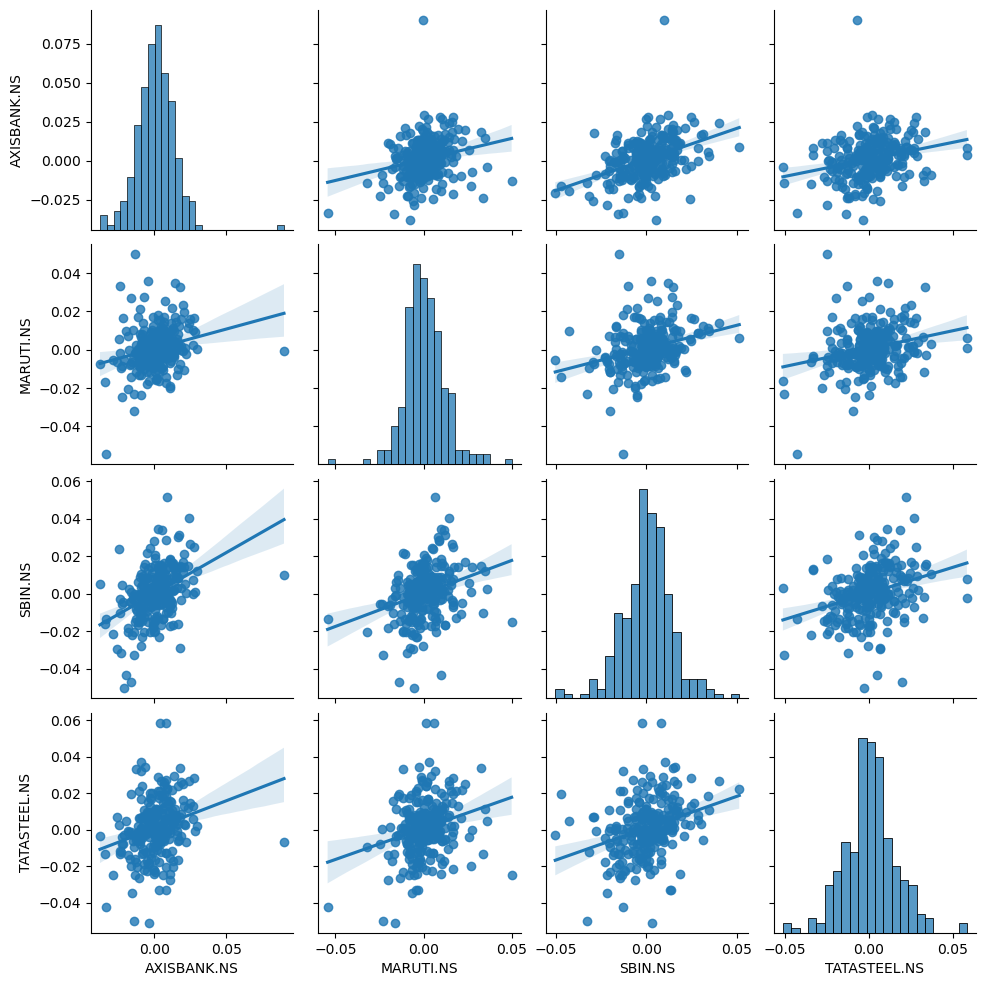

In [48]:

# Pairplot of returns
sns.pairplot(company_rets, kind='reg')


Text(0.5, 1.0, 'Correlation of Stock Closing Prices')

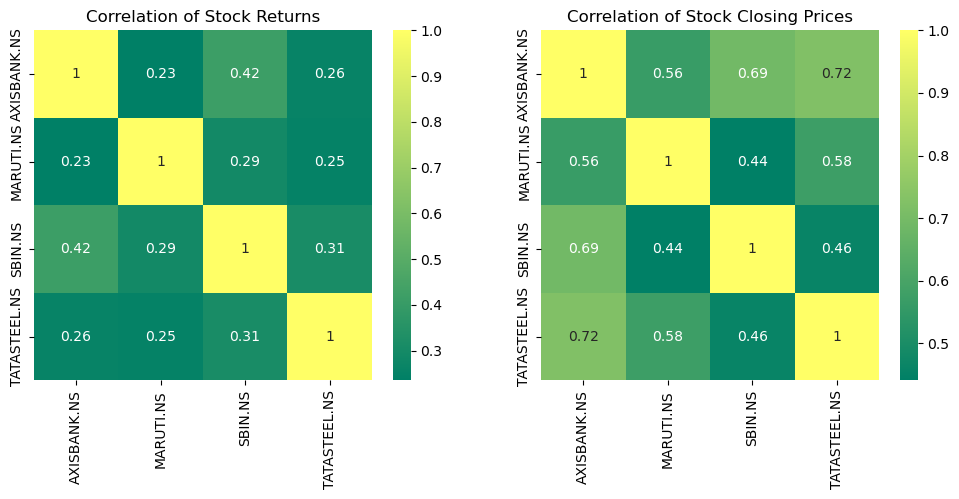

In [49]:

# Correlation heatmap
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.heatmap(company_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')



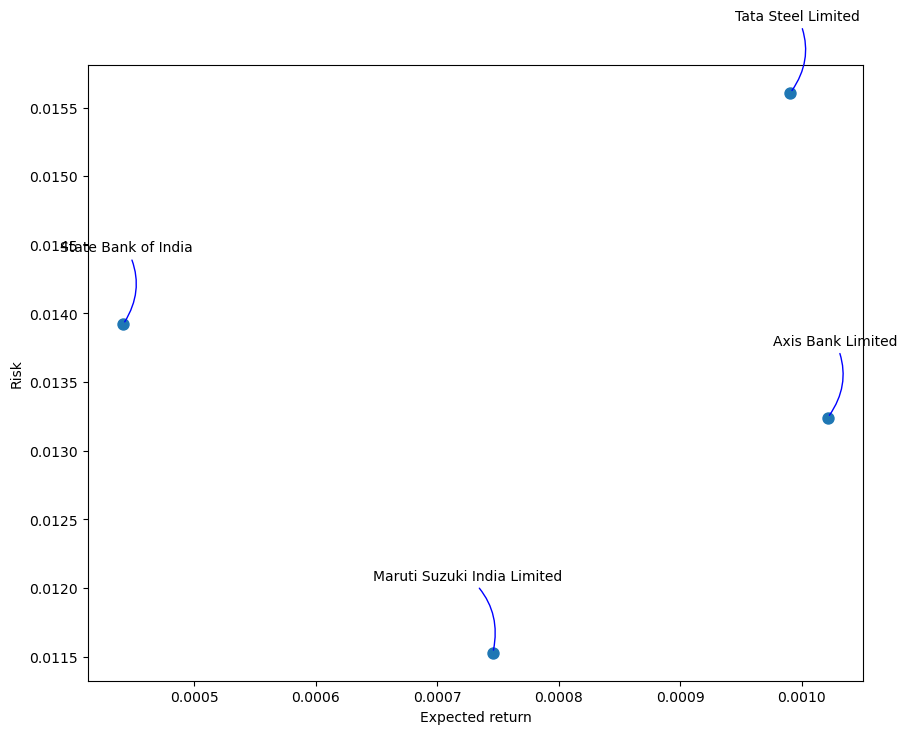

In [50]:
# Risk vs. Expected Return
rets = company_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for symbol in company_symbols:
    plt.annotate(company_names[symbol], xy=(rets.mean()[symbol], rets.std()[symbol]), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


In [51]:


# Stock price prediction (LSTM)
# You can use the code you provided earlier to predict stock prices for these companies.

# Remember to adjust the company_symbols and company_names as needed in the code above.


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [53]:
# Set up Pandas DataReader to use Yahoo Finance
yf.pdr_override()

# The list of companies
company_symbols = ['MARUTI.NS', 'SBIN.NS', 'AXISBANK.NS', 'TATASTEEL.NS']

# Set the start and end dates for data retrieval
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download the data for the companies
company_data = {}
for symbol in company_symbols:
    company_data[symbol] = yf.download(symbol, start, end)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [54]:
company_data

{'MARUTI.NS':                     Open          High           Low         Close  \
 Date                                                                 
 2022-09-13   8972.299805   8989.049805   8910.900391   8926.500000   
 2022-09-14   8859.849609   9000.000000   8825.700195   8967.200195   
 2022-09-15   9030.049805   9325.000000   9030.000000   9209.750000   
 2022-09-16   9209.500000   9315.900391   9020.049805   9189.650391   
 2022-09-19   9175.299805   9343.450195   9070.000000   9280.849609   
 ...                  ...           ...           ...           ...   
 2023-09-07  10150.000000  10300.900391  10150.000000  10280.750000   
 2023-09-08  10399.000000  10400.000000  10300.000000  10332.000000   
 2023-09-11  10345.000000  10550.000000  10344.000000  10533.849609   
 2023-09-12  10544.000000  10568.400391  10405.000000  10503.599609   
 2023-09-13  10500.000000  10536.400391  10440.000000  10473.400391   
 
                Adj Close   Volume  
 Date                    

In [55]:
# Set up company names
company_names = {
    'MARUTI.NS': 'Maruti Suzuki India Limited',
    'SBIN.NS': 'State Bank of India',
    'AXISBANK.NS': 'Axis Bank Limited',
    'TATASTEEL.NS': 'Tata Steel Limited'
}


In [56]:
# Function to train and predict stock prices using LSTM
def predict_stock_price(company_symbol):
    # Get the stock data
    df = company_data[company_symbol]
    
    # Create a new dataframe with only the 'Close' column
    data = df.filter(['Close'])
    
    # Convert the dataframe to a numpy array
    dataset = data.values
    
    # Get the number of rows to train the model on
    training_data_len = int(np.ceil(len(dataset) * .95))
    
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(dataset)
    
    # Create the training data set
    train_data = scaled_data[0:int(training_data_len), :]
    
    # Split the data into x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)

    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Create the testing data set
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []
    y_test = dataset[training_data_len:, :]
    
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])
    
    # Convert the data to a numpy array
    x_test = np.array(x_test)
    
    # Reshape the data
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    
    # Get the model's predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    
    return predictions

Last Piece of Code

C:\Users\MUHESH S\AppData\Local\Temp\ipykernel_11512\104151512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices[symbol]


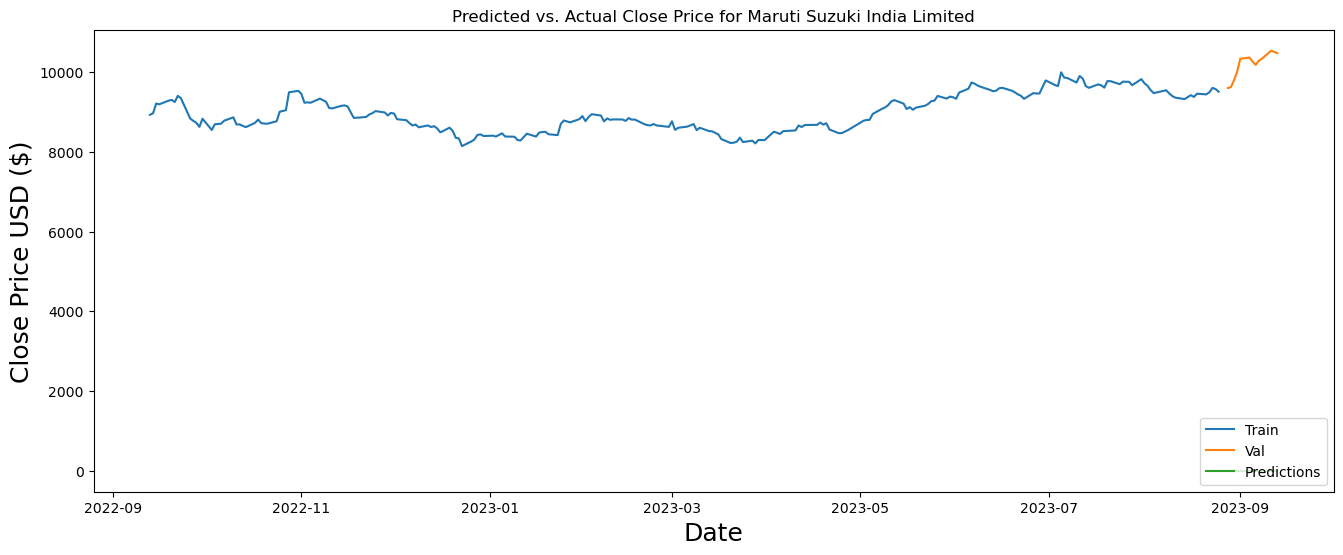

C:\Users\MUHESH S\AppData\Local\Temp\ipykernel_11512\104151512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices[symbol]


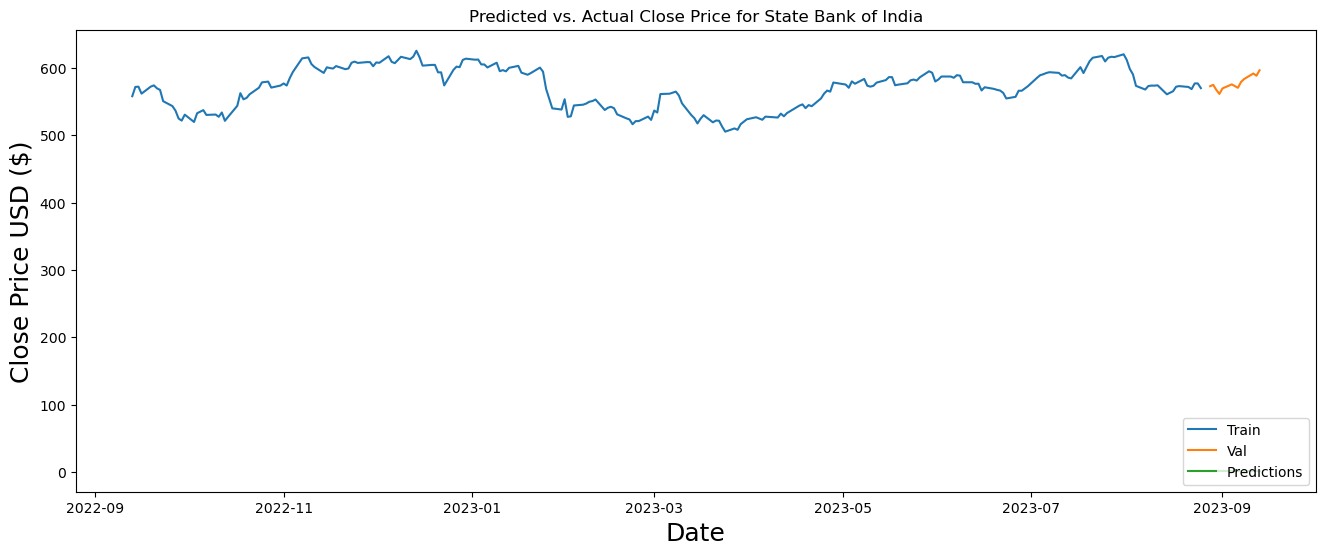

C:\Users\MUHESH S\AppData\Local\Temp\ipykernel_11512\104151512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices[symbol]


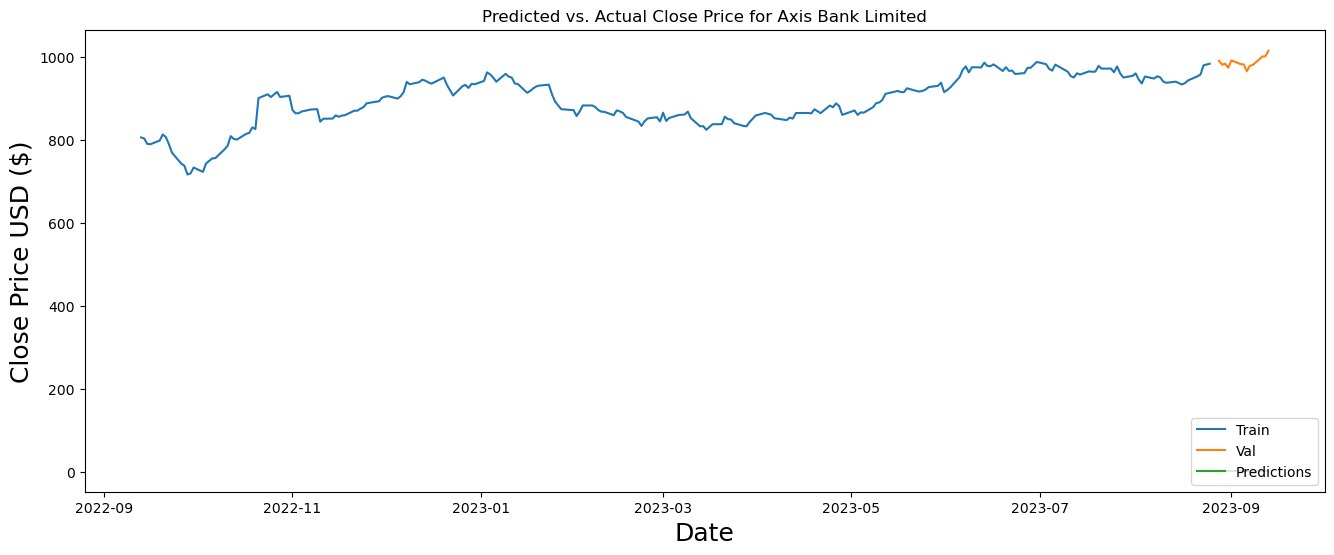

C:\Users\MUHESH S\AppData\Local\Temp\ipykernel_11512\104151512.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_prices[symbol]


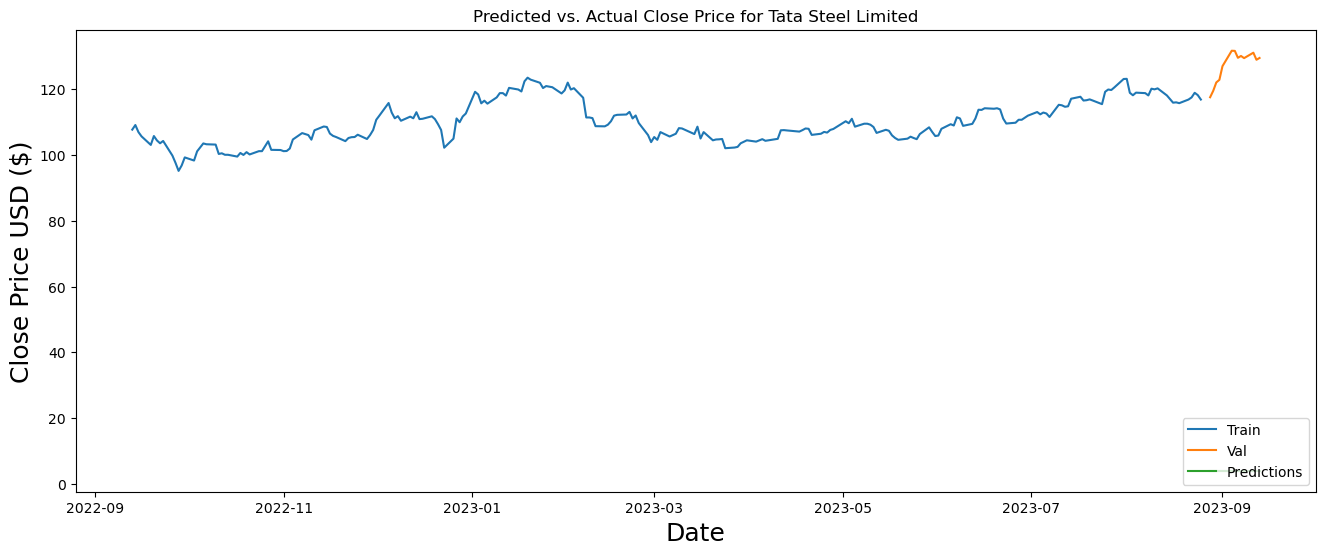

In [85]:
# Plot the data
predicted_prices = {'MARUTI.NS':1, 'SBIN.NS':2, 'AXISBANK.NS':3, 'TATASTEEL.NS':4}

for symbol in company_symbols:
    df = company_data[symbol]
    train = df[:int(len(df) * 0.95)]
    valid = df[int(len(df) * 0.95):]
    valid['Predictions'] = predicted_prices[symbol]
    
    plt.figure(figsize=(16, 6))
    plt.title(f'Predicted vs. Actual Close Price for {company_names[symbol]}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

<!-- for debugging the previous code as it is giving me not an output -->





The Below lines of codes are for debugging the previous lines of code.

Length of train['Close']: 237
Length of valid['Close']: 13


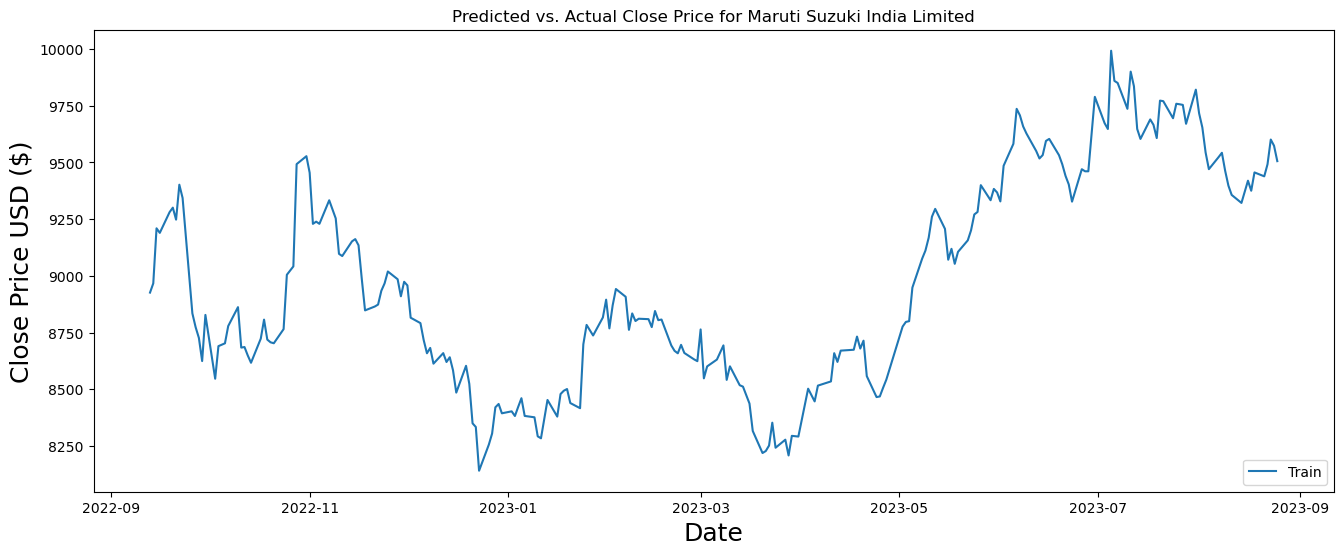

Length of train['Close']: 237
Length of valid['Close']: 13


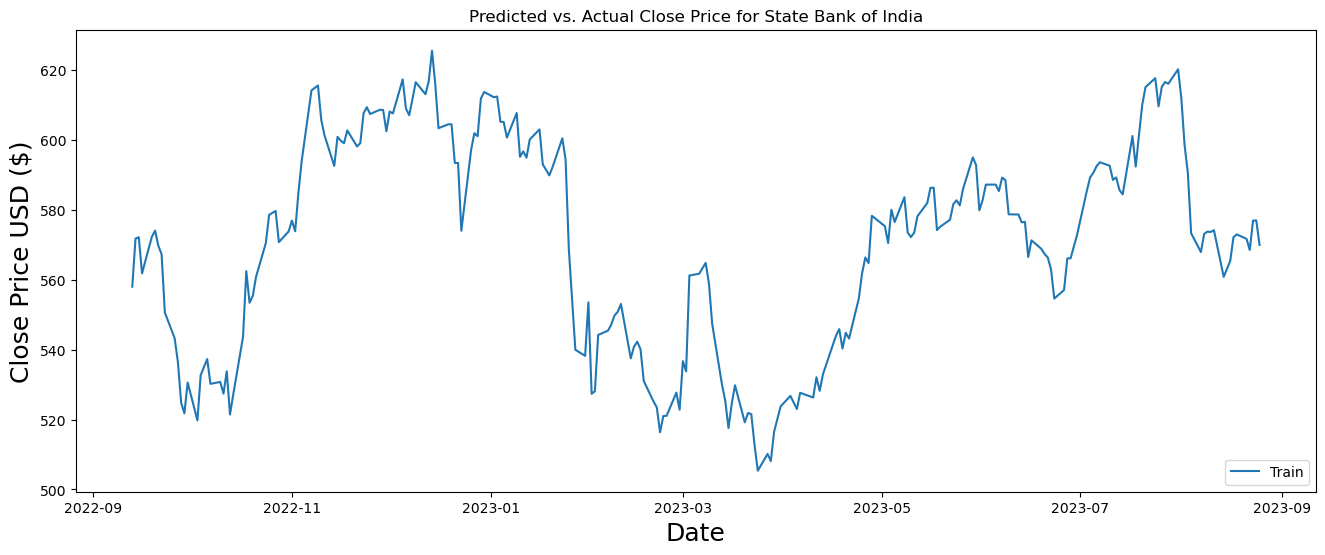

Length of train['Close']: 237
Length of valid['Close']: 13


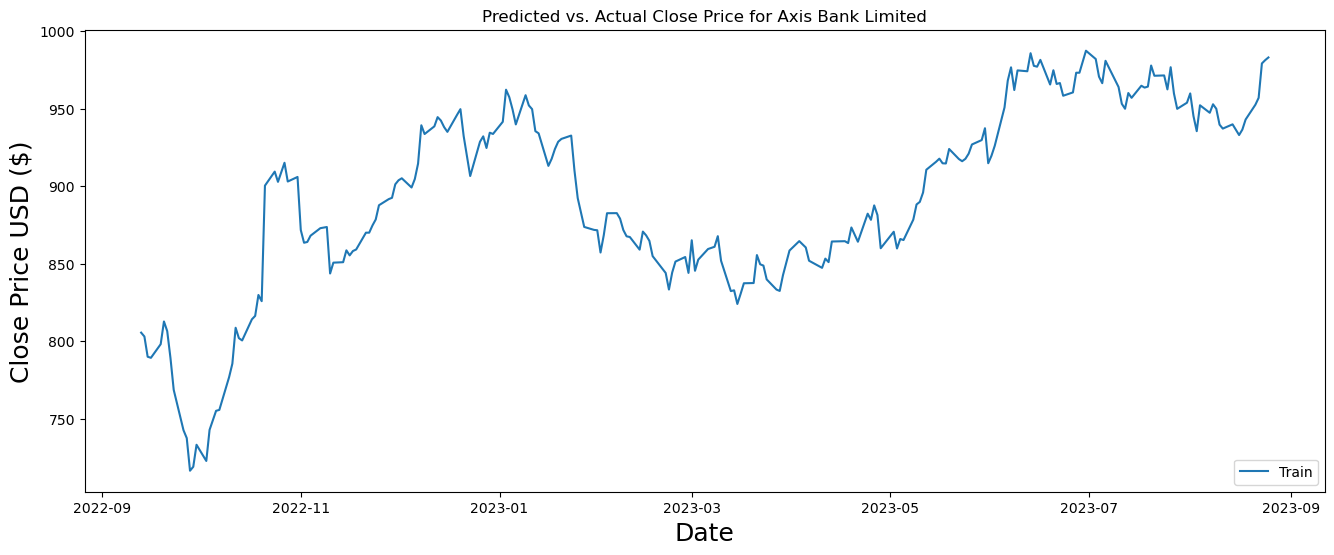

Length of train['Close']: 237
Length of valid['Close']: 13


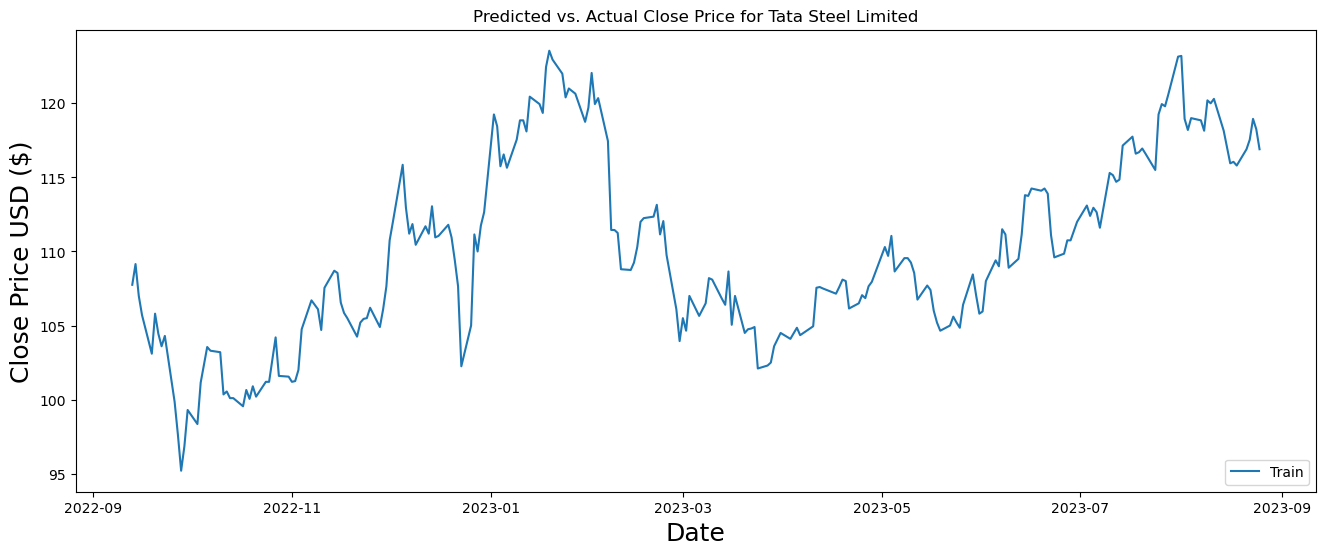

In [86]:
for symbol in company_symbols:
    df = company_data[symbol]
    train = df[:int(len(df) * 0.95)]
    valid = df[int(len(df) * 0.95):]

    #valid['Predictions'] = predicted_prices[symbol]      ### Error
    
    print(f"Length of train['Close']: {len(train['Close'])}")
    print(f"Length of valid['Close']: {len(valid['Close'])}")

    # print(f"Length of valid['Predictions']: {len(valid['Predictions'])}")   ## Error 
    
    ### Check if the lengths match
    
    ### Add debugging statements to check lengths
    
    plt.figure(figsize=(16, 6))
    plt.title(f'Predicted vs. Actual Close Price for {company_names[symbol]}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    
    ### Ensure that you are plotting the correct data
    plt.plot(train.index, train['Close'])

    # plt.plot(valid.index, valid[['Close', 'Predictions']])    ###Error
    
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()


In [88]:
for symbol in company_symbols:
    df = company_data[symbol]
    train = df[:int(len(df) * 0.95)]
    valid = df[int(len(df) * 0.95):]
    
    # Assuming predicted_prices is a list or array of predictions
    predictions = predicted_prices[symbol]
    predictions=str(predictions)
    # Check the length of 'Predictions'
    print(f"Length of 'Predictions': {len(predictions)}")
    
    # Check the length of 'valid' DataFrame index
    print(f"Length of 'valid' DataFrame index: {len(valid.index)}")
    
    # Ensure that 'Predictions' data aligns properly with 'valid' DataFrame
    if len(predictions) != len(valid.index):
        print("Length mismatch between 'Predictions' and 'valid' DataFrame.")
        continue  # Skip this iteration if there's a mismatch
    
    # Assign 'Predictions' to the 'Predictions' column in 'valid'
    valid['Predictions'] = predictions
    
    # Plot the data
    plt.figure(figsize=(16, 6))
    plt.title(f'Predicted vs. Actual Close Price for {company_names[symbol]}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    
    plt.plot(train.index, train['Close'])
    plt.plot(valid.index, valid[['Close', 'Predictions']])
    
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()


Length of 'Predictions': 1
Length of 'valid' DataFrame index: 13
Length mismatch between 'Predictions' and 'valid' DataFrame.
Length of 'Predictions': 1
Length of 'valid' DataFrame index: 13
Length mismatch between 'Predictions' and 'valid' DataFrame.
Length of 'Predictions': 1
Length of 'valid' DataFrame index: 13
Length mismatch between 'Predictions' and 'valid' DataFrame.
Length of 'Predictions': 1
Length of 'valid' DataFrame index: 13
Length mismatch between 'Predictions' and 'valid' DataFrame.


Now I can see there is difference between valid(13) and predictions(12). Now puzzle is how to make it either both of them either 12 nor 13 sir.

In [94]:
# predictions.head()
print(predictions)

4


In [90]:
valid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-28,117.000000,118.250000,117.000000,117.599998,117.599998,19218821
2023-08-29,118.500000,120.150002,117.750000,119.550003,119.550003,36038317
2023-08-30,120.500000,122.699997,120.250000,122.099998,122.099998,51467177
2023-08-31,122.849998,123.599998,122.150002,122.900002,122.900002,60626985
2023-09-01,123.500000,128.699997,123.400002,127.050003,127.050003,76460408
